In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [15]:
#Initialisation

N = 10000
d = 10
sum_rewards = [0] * d
total_rewards = 0 
Numbers_selection = [0] * d

ads_selected = []

#Implementation

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if Numbers_selection[i] > 0:
            average_reward = sum_rewards[i] / Numbers_selection[i]
            delta_i = math.sqrt(3 * math.log(n+1) /Numbers_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    Numbers_selection[ad] = Numbers_selection[ad]+ 1
    sum_rewards[ad] = sum_rewards[ad] + df.values[n, ad] #reward collected
    total_rewards = total_rewards + df.values[n, ad]

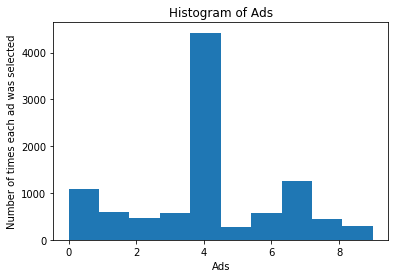

In [17]:
#Visualise the results

plt.hist(ads_selected)
plt.title('Histogram of Ads')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()